## Challenge Set 3  
Topic: Linear Splitting  
Date: July 25th, 2016  
Name: Graham Anderson  
Collaborators: Marc, Allison, Seth  

In [2]:
import pandas as pd
import sklearn
from sklearn import cross_validation as cv
from sklearn import preprocessing
from patsy import dmatrices,dmatrix
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from patsy import dmatrices
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('2013_movies.csv')

In [6]:
len(df),df.head()
df['Ones'] = 1

### Challenge 1
Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

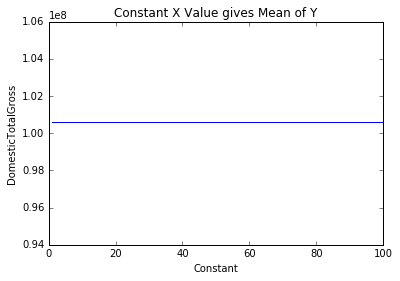

In [7]:
y, X = dmatrices('DomesticTotalGross ~ Ones', 
                 data = df, return_type='matrix')
clf = LinearRegression()
clf.fit(X,y)
X_test = dmatrix('np.linspace(1,100,100)', return_type='matrix')
plt.plot(X_test[:,1], clf.predict(X_test))

plt.title('Constant X Value gives Mean of Y')
plt.ylabel('DomesticTotalGross')
plt.xlabel('Constant')

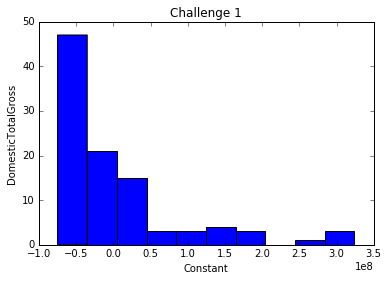

In [9]:
plt.hist(y - clf.predict(X_test))
plt.title('Challenge 1')
plt.ylabel('DomesticTotalGross')
plt.xlabel('Constant')


### Challenge 2
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [56]:
df['Continuous']= np.linspace(1,100,len(df))

### Just do Y- Mean of Y

In [47]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Ones,Continuous
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1,1
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1,2
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1,3
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1,4
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1,5


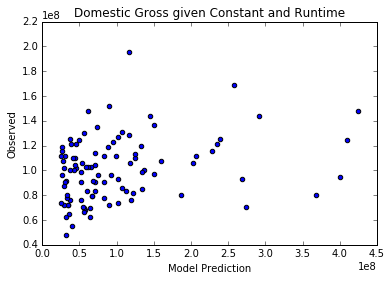

In [12]:
y, X = dmatrices('DomesticTotalGross ~ Ones + Runtime', 
                 data = df, return_type='matrix')
clf = LinearRegression()
clf.fit(X,y)
clf.predict(X)
plt.scatter(y, clf.predict(X))

plt.title('Domestic Gross given Constant and Runtime')
plt.ylabel('Observed')
plt.xlabel('Model Prediction')

### Challenge 3
Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

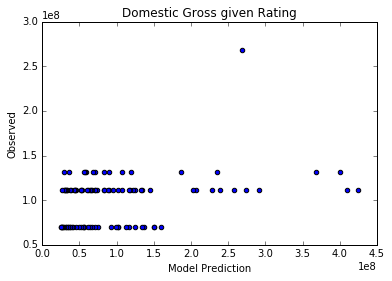

In [13]:
y, X = dmatrices('DomesticTotalGross ~ Rating', 
                 data = df, return_type='matrix')
clf = LinearRegression()
clf.fit(X,y)
clf.predict(X)
plt.scatter(y, clf.predict(X))

plt.title('Domestic Gross given Rating')
plt.ylabel('Observed')
plt.xlabel('Model Prediction')


In [63]:
clf.score(X,y)

0.10922931211582154

>Given R2, correlation between domestic gross and rating is very low

### Challenge 4
Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

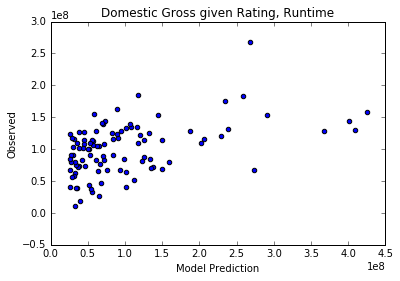

In [15]:
y, X = dmatrices('DomesticTotalGross ~ Rating  + Runtime', 
                 data = df, return_type='matrix')
clf = LinearRegression()
clf.fit(X,y)
clf.predict(X)
plt.scatter(y, clf.predict(X))

plt.title('Domestic Gross given Rating, Runtime')
plt.ylabel('Observed')
plt.xlabel('Model Prediction')

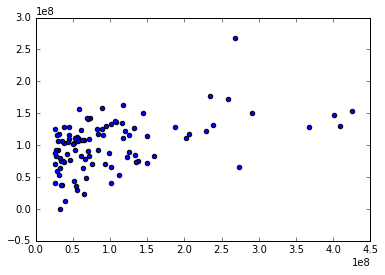

In [69]:
y, X = dmatrices('DomesticTotalGross ~ Rating  + np.log(Runtime)', 
                 data = df, return_type='matrix')
clf = LinearRegression()
clf.fit(X,y)
clf.predict(X)
plt.scatter(y, clf.predict(X))

### Challenge 5
Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

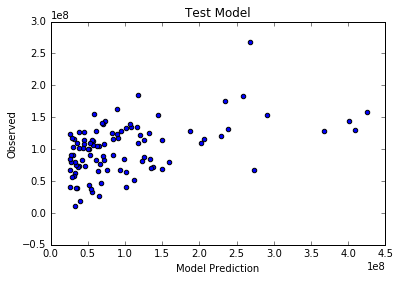

In [16]:
x_train, x_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.25, random_state=1234)
model = LinearRegression().fit(x_train, y_train)
model.predict(X)
plt.scatter(y, clf.predict(X))

plt.title('Test Model')
plt.ylabel('Observed')
plt.xlabel('Model Prediction')

In [84]:
print("R score: {0}".format(model.score(X,y)))
print("train mean square error: {0}".format(metrics.mean_squared_error(y_train, model.predict(x_train))))
print("train mean square error: {0}".format(metrics.mean_squared_error(y_test, model.predict(x_test))))


R score: 0.20340588477920443
train mean square error: 6043102645502580.0
train mean square error: 5965276401768705.0
